## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [3]:
print(regr.coef_)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [4]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.42


### LASSO

In [5]:
# 讀取資料
boston = datasets.load_boston()

# 切分訓練集、測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立模型
lasso = linear_model.Lasso(alpha=1.0)

# 訓練
lasso.fit(x_train, y_train)

# 結果
y_pred = lasso.predict(x_test)

In [6]:
lasso.coef_

array([-0.06494981,  0.04581458, -0.        ,  0.        , -0.        ,
        1.18140024,  0.01109101, -0.73695809,  0.23350042, -0.01551065,
       -0.69270805,  0.00763157, -0.6927848 ])

In [7]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 28.95


### Ridge

In [8]:
# 讀取資料
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立模型
ridge = linear_model.Ridge(alpha=1.0)

# 訓練
ridge.fit(x_train, y_train)

# 結果
y_pred = ridge.predict(x_test)

In [9]:
ridge.coef_

array([-1.12499445e-01,  4.79562332e-02, -2.40438147e-02,  2.96199458e+00,
       -9.33966118e+00,  3.93079015e+00, -1.73821202e-02, -1.43347691e+00,
        2.75239392e-01, -1.38920708e-02, -8.31116943e-01,  9.15637729e-03,
       -4.66460539e-01])

In [10]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.74


### 不同alpha結果

In [11]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

print('lasso coef: {}'.format(lasso.coef_))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

lasso coef: [-0.10618872  0.04886351 -0.04536655  1.14953069 -0.          3.82353877
 -0.02089779 -1.23590613  0.26008876 -0.01517094 -0.74673362  0.00963864
 -0.49877104]
Mean squared error: 26.45


In [11]:
# 設定alpha值
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

#### Lasso

In [12]:
# 初始化模型
lasso = linear_model.Lasso()

In [15]:
# 參數矩陣
coefs = []
mse = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    y_pred = lasso.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

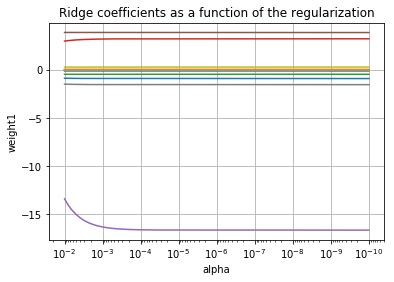

In [16]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weight1')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

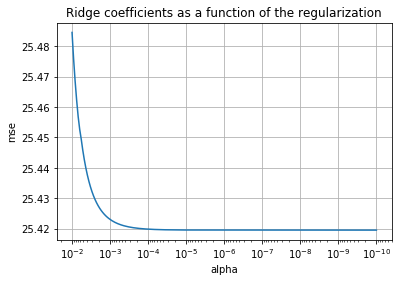

In [17]:
ax = plt.gca()

ax.plot(alphas, mse)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

#### Ridge

In [22]:
ridge = linear_model.Ridge()

In [23]:
# 參數矩陣
coefs = []
mse = []
# 根据不同的alpha训练出不同的模型参数
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(x_train, y_train)
    coefs.append(ridge.coef_)
    y_pred = ridge.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred))

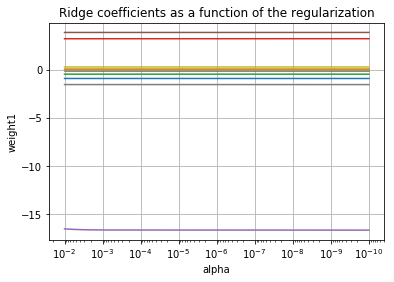

In [24]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weight1')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

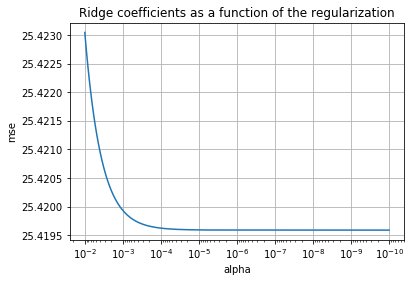

In [25]:
ax = plt.gca()

ax.plot(alphas, mse)
ax.set_xscale('log')    #x轴使用对数表示
ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()